In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandasql as pdsql
import sys

sys.path.append("..")
import analysislib as alib

In [2]:
pdsqleval = lambda q: pdsql.sqldf(q, globals())

In [3]:
master2 = pd.read_csv("../../data/2025-03-04-time-18-40-26-second-run-finch2/master.csv", index_col=0)

In [19]:
pdsqleval("SELECT * FROM master2").columns

Index(['cbSize', 'cioengine', 'ciodepth', 'crw', 'cnproc', 'cdevice',
       'cdirect', 'cmemlim', 'readBW_bytes', 'readBW', 'writeBW_bytes',
       'writeBW', 'avgreadlat_ns', 'avgreadlat', 'avgwritelat_ns',
       'avgwritelat', 'USR_UTIL_perc', 'SYS_UTIL_perc', 'IOW_UTIL_perc',
       'IDL_UTIL_perc', 'CPU_UTIL_perc'],
      dtype='object')

In [32]:
pdsqleval("""
    SELECT crw, ciodepth, cnproc, cdevice, readBW, SYS_UTIL_perc, IDL_UTIL_perc, CPU_UTIL_perc, IOW_UTIL_perc
    FROM master2
    WHERE cioengine = 'mmap'
    ORDER BY crw, cdevice, cnproc, ciodepth
""")

,crw,ciodepth,cnproc,cdevice,readBW,SYS_UTIL_perc,IDL_UTIL_perc,CPU_UTIL_perc,IOW_UTIL_perc
0,randread,1,1,ssd,53.5 MB,0.078255,99.1120,0.888026,0.784176
1,randread,1,32,ssd,1.5 GB,2.020000,72.3510,27.649000,24.896700
2,randread,1,64,ssd,2.6 GB,4.227270,52.8936,47.106400,41.394500
3,randread,1,1,zram,639.5 MB,0.780196,98.9865,1.013530,0.000196
4,randread,1,32,zram,11.7 GB,19.790000,72.4850,27.515000,0.000000
5,randread,1,64,zram,15.1 GB,25.480000,62.6300,37.370000,0.000000
6,randrw,1,1,ssd,23.7 MB,0.095890,99.1193,0.880695,0.757033
7,randrw,1,32,ssd,524.8 MB,1.985000,72.3410,27.659000,25.125300
8,randrw,1,64,ssd,791.8 MB,3.633000,53.2115,46.788500,42.040000
9,randrw,1,1,zram,172.4 MB,0.825053,99.0401,0.959895,0.000316


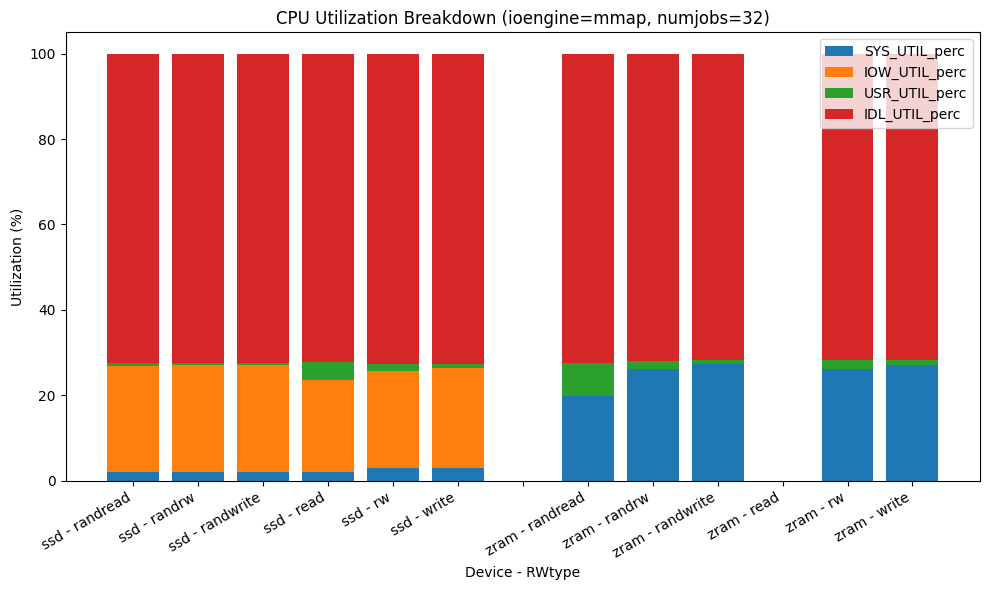

In [4]:
alib.stacked_barplot_cpu_util(df=master2, numjobs_val=32, show=False)
plt.savefig("../../processed-data/2025-03-04-second-run-finch2/graphs/all_util-32-proc.png")

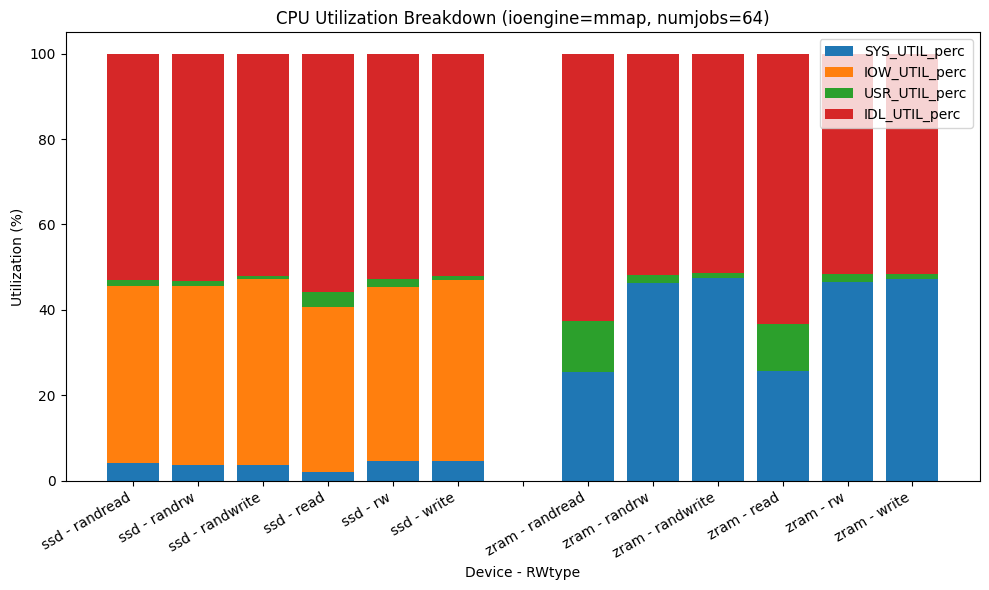

In [6]:
alib.stacked_barplot_cpu_util(df=master2, numjobs_val=64, show=False)
plt.savefig("../../processed-data/2025-03-04-second-run-finch2/graphs/all_util-64-proc.png")